# AdaptiveSplit Analysis

In [5]:
from __future__ import annotations
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

from random import sample
import warnings

In [6]:
# average scores/pvals through each permutation: 
# i.e. average data with different random seed, keep information for different sample sizes;
def mean_window(arr, n_samples, n_permutations):
    windows = np.array(arr).reshape(n_permutations, n_samples)
    avg = np.mean(windows, axis=0)
    return avg

def std_window(arr, n_samples, n_permutations):
    windows = np.array(arr).reshape(n_permutations, n_samples)
    std = np.std(windows, axis=0)
    return std

In [7]:
def get_training(dataset, n_samples, n_permutations):
    dataset = dataset    
    data = pd.read_csv(dataset + '/results.csv', delimiter=',', encoding='utf-8')

    n_samples = n_samples
    n_permutations = n_permutations

    # train scores;
    pareto_train_scores = mean_window(data['pareto_train_scores'], n_samples, n_permutations)
    pareto_train_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="pareto_train_scores").sem()

    halfsplit_train_scores = mean_window(data['halfsplit_train_scores'], n_samples, n_permutations)
    halfsplit_train_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="halfsplit_train_scores").sem()

    split9010_train_scores = mean_window(data['split90-10_train_scores'], n_samples, n_permutations)
    split9010_train_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="split90-10_train_scores").sem()

    adaptivesplit_train_scores = mean_window(data['adaptivesplit_train_scores'], n_samples, n_permutations)
    adaptivesplit_train_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="adaptivesplit_train_scores").sem()

    return pareto_train_scores, pareto_train_se, halfsplit_train_scores, halfsplit_train_se, split9010_train_scores, split9010_train_se, adaptivesplit_train_scores, adaptivesplit_train_se

def get_test(dataset, n_samples, n_permutations):
    dataset = dataset    
    data = pd.read_csv(dataset + '/results.csv', delimiter=',', encoding='utf-8')

    n_samples = n_samples
    n_permutations = n_permutations

    # test scores; 
    pareto_test_scores = mean_window(data['pareto_test_scores'], n_samples, n_permutations)
    pareto_test_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="pareto_test_scores").sem()

    halfsplit_test_scores = mean_window(data['halfsplit_test_scores'], n_samples, n_permutations)
    halfsplit_test_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="halfsplit_test_scores").sem()

    split9010_test_scores = mean_window(data['split90-10_test_scores'], n_samples, n_permutations)
    split9010_test_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="split90-10_test_scores").sem()

    adaptivesplit_test_scores = mean_window(data['adaptivesplit_test_scores'], n_samples, n_permutations)
    adaptivesplit_test_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="adaptivesplit_test_scores").sem()

    return pareto_test_scores, pareto_test_se, halfsplit_test_scores, halfsplit_test_se, split9010_test_scores, split9010_test_se, adaptivesplit_test_scores, adaptivesplit_test_se

def get_pvals(dataset, n_samples, n_permutations):
    dataset = dataset    
    data = pd.read_csv(dataset + '/results.csv', delimiter=',', encoding='utf-8')

    n_samples = n_samples
    n_permutations = n_permutations

    # p-values;
    pareto_p_values = mean_window(data['pareto_p_values'], n_samples, n_permutations)
    pareto_pval_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="pareto_p_values").sem()

    halfsplit_p_values = mean_window(data['halfsplit_p_values'], n_samples, n_permutations)
    halfsplit_pval_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="halfsplit_p_values").sem()

    split9010_p_values = mean_window(data['split90-10_p_values'], n_samples, n_permutations)
    split9010_pval_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="split90-10_p_values").sem()

    adaptivesplit_p_values = mean_window(data['adaptivesplit_p_values'], n_samples, n_permutations)
    adaptivesplit_pval_se = data.pivot( index="random_seed", columns="truncate_sample_size", values="adaptivesplit_p_values").sem()

    return pareto_p_values, pareto_pval_se, halfsplit_p_values, halfsplit_pval_se, split9010_p_values, split9010_pval_se, adaptivesplit_p_values, adaptivesplit_pval_se

def plot_analyses(dataset, n_samples, n_permutations, scoring_label=""):

    dataset = dataset    
    data = pd.read_csv(dataset + '/results.csv', delimiter=',', encoding='utf-8')

    n_samples = n_samples
    n_permutations = n_permutations
    
    sample_sizes = data['truncate_sample_size'][0:n_samples]
    total_sample_size = np.max(sample_sizes)
    adaptivesplit_sample_size = mean_window(data['adaptivesplit_sample_size'], 5, 100)

    # plot train scores;
    plt.figure(figsize=(40, 10))
    mpl.rcParams['lines.linewidth'] = 8
    set_labels_size = 35

    # plt.subplot(1, 3, 1)
    # plt.plot(sample_sizes, pareto_train_scores, 'r')
    # plt.fill_between(sample_sizes, pareto_train_scores-(pareto_train_se/2), pareto_train_scores+(pareto_train_se/2), edgecolor='r', facecolor='r', alpha=0.1)

    # plt.plot(sample_sizes, halfsplit_train_scores, 'y')
    # plt.fill_between(sample_sizes, halfsplit_train_scores-(halfsplit_train_se/2), halfsplit_train_scores+(halfsplit_train_se/2), edgecolor='y', facecolor='y', alpha=0.1)

    # plt.plot(sample_sizes, split9010_train_scores, 'g')
    # plt.fill_between(sample_sizes, split9010_train_scores-(split9010_train_se/2), split9010_train_scores+(split9010_train_se/2), edgecolor='g', facecolor='g', alpha=0.1)

    # plt.plot(sample_sizes, adaptivesplit_train_scores, 'b-o', markersize=22)
    # plt.fill_between(sample_sizes, adaptivesplit_train_scores-(adaptivesplit_train_se/2), adaptivesplit_train_scores+(adaptivesplit_train_se/2), edgecolor='b', facecolor='b', alpha=0.1)

    # plt.title('Training Scores', fontsize=40, fontweight='bold')
    # plt.xticks(fontsize = set_labels_size)
    # plt.yticks(fontsize = set_labels_size)
    # plt.grid(True, color = "grey", linewidth = "2.5", linestyle = "--", alpha=0.4, axis='y')

    # label points on the plot
    # for index, x, y in zip(range(len(sample_sizes)), sample_sizes, adaptivesplit_train_scores):
    #     plt.text(x = x, y = y, s = '{}-{}'.format(int((adaptivesplit_sample_size[index]/total_sample_size)*100),
    #                                 100 - int((adaptivesplit_sample_size[index]/total_sample_size)*100)), color = 'white').set_backgroundcolor('#0000FF')

    # plot test scores;
    plt.subplot(1, 2, 1)
    plt.plot(sample_sizes, pareto_test_scores, 'r')
    plt.fill_between(sample_sizes, pareto_test_scores-(pareto_test_se/2), pareto_test_scores+(pareto_test_se/2), edgecolor='r', facecolor='r', alpha=0.1)

    plt.plot(sample_sizes, halfsplit_test_scores, 'y')
    plt.fill_between(sample_sizes, halfsplit_test_scores-(halfsplit_test_se/2), halfsplit_test_scores+(halfsplit_test_se/2), edgecolor='y', facecolor='y', alpha=0.1)

    plt.plot(sample_sizes, split9010_test_scores, 'g')
    plt.fill_between(sample_sizes, split9010_test_scores-(split9010_test_se/2), split9010_test_scores+(split9010_test_se/2), edgecolor='g', facecolor='g', alpha=0.1)

    plt.plot(sample_sizes, adaptivesplit_test_scores, 'b-o', markersize=0)
    plt.fill_between(sample_sizes, adaptivesplit_test_scores-(adaptivesplit_test_se/2), adaptivesplit_test_scores+(adaptivesplit_test_se/2), edgecolor='b', facecolor='b', alpha=0.1)

    plt.title('Test Scores', fontsize=40, fontweight='bold')
    plt.ylabel(scoring_label, fontsize=40, fontweight='bold')
    plt.xlabel("sample size", fontsize=40, fontweight='bold')
    plt.xticks(fontsize = set_labels_size)
    plt.yticks(fontsize = set_labels_size)
    plt.grid(True, color = "grey", linewidth = "2.5", linestyle = "--", alpha=0.4, axis='y')

    # label points on the plot
    for index, x, y in zip(range(len(sample_sizes)), sample_sizes, adaptivesplit_test_scores):
        plt.text(x = x, y = y, s = '{}-{}'.format(int((adaptivesplit_sample_size[index]/total_sample_size)*100),
                                    100 - int((adaptivesplit_sample_size[index]/total_sample_size)*100)), color = 'white', fontsize=20).set_backgroundcolor('#0000FF')

    # plot p-values;
    plt.subplot(1, 2, 2)
    plt.plot(sample_sizes, pareto_p_values, 'r')
    plt.fill_between(sample_sizes, pareto_p_values-(pareto_pval_se/2), pareto_p_values+(pareto_pval_se/2), edgecolor='r', facecolor='r', alpha=0.1)

    plt.plot(sample_sizes, halfsplit_p_values, 'y')
    plt.fill_between(sample_sizes, halfsplit_p_values-(halfsplit_pval_se/2), halfsplit_p_values+(halfsplit_pval_se/2), edgecolor='y', facecolor='y', alpha=0.1)

    plt.plot(sample_sizes, split9010_p_values, 'g')
    plt.fill_between(sample_sizes, split9010_p_values-(split9010_pval_se/2), split9010_p_values+(split9010_pval_se/2), edgecolor='g', facecolor='g', alpha=0.1)

    plt.plot(sample_sizes, adaptivesplit_p_values, 'b-o', markersize=0)
    plt.fill_between(sample_sizes, adaptivesplit_p_values-(adaptivesplit_pval_se/2), adaptivesplit_p_values+(adaptivesplit_pval_se/2), edgecolor='b', facecolor='b', alpha=0.1)

    # label points on the plot
    for index, x, y in zip(range(len(sample_sizes)), sample_sizes, adaptivesplit_p_values):
        plt.text(x = x, y = y, s = '{}-{}'.format(int((adaptivesplit_sample_size[index]/total_sample_size)*100),
                                    100 - int((adaptivesplit_sample_size[index]/total_sample_size)*100)), color = 'white', fontsize=20).set_backgroundcolor('#0000FF')

    plt.title('Statistical significance', fontsize=40, fontweight='bold')
    plt.ylabel('P-values', fontsize=40, fontweight='bold')
    plt.xlabel("sample size", fontsize=40, fontweight='bold')
    plt.xticks(fontsize = set_labels_size)
    plt.yticks(fontsize = set_labels_size)
    plt.grid(True, color = "grey", linewidth = "2.5", linestyle = "--", alpha=0.4, axis='y')
    plt.show()


## BCW dataset, results (train and test scores, p-values)

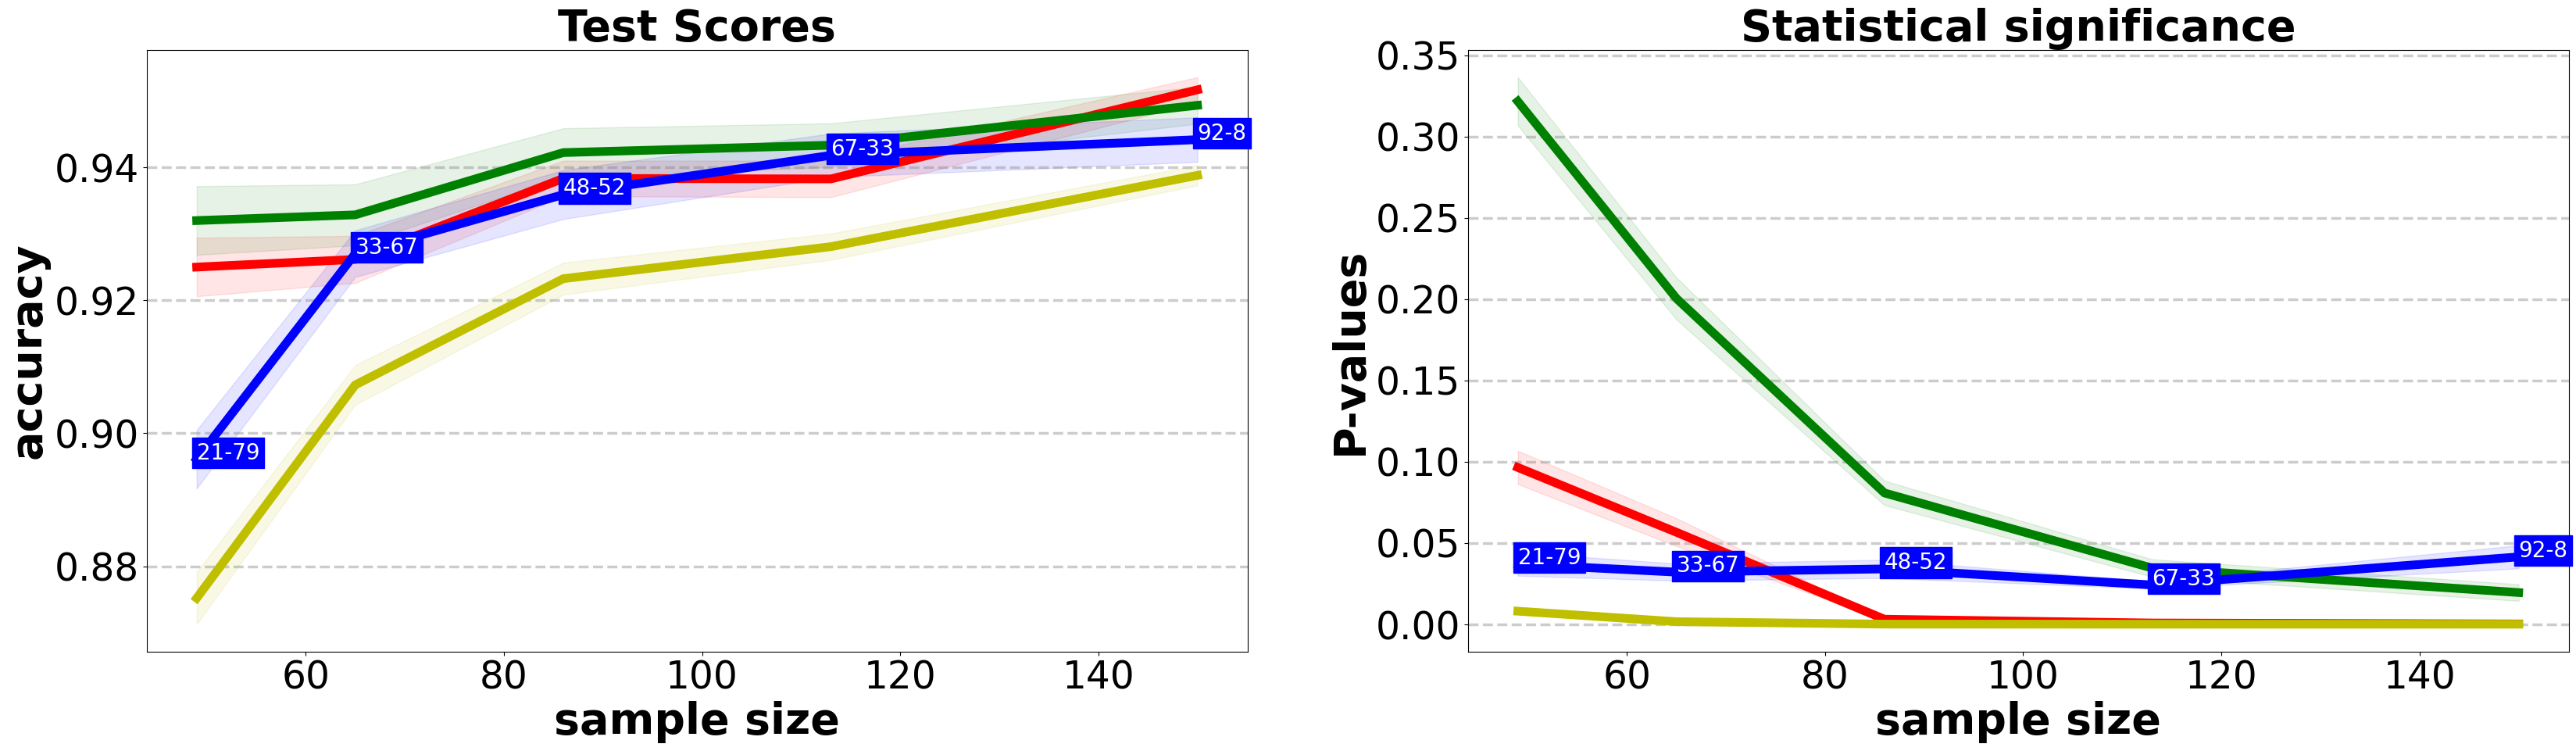

<Figure size 640x480 with 0 Axes>

In [8]:
dataset = '../data_out/BCW'

# Get data;
pareto_train_scores, pareto_train_se, \
halfsplit_train_scores, halfsplit_train_se, \
split9010_train_scores, split9010_train_se, \
adaptivesplit_train_scores, adaptivesplit_train_se = get_training(dataset, 5, 100)

pareto_test_scores, pareto_test_se, \
halfsplit_test_scores, halfsplit_test_se, \
split9010_test_scores, split9010_test_se, \
adaptivesplit_test_scores, adaptivesplit_test_se = get_test(dataset, 5, 100)

pareto_p_values, pareto_pval_se, \
halfsplit_p_values, halfsplit_pval_se, \
split9010_p_values, split9010_pval_se, \
adaptivesplit_p_values, adaptivesplit_pval_se = get_pvals(dataset, 5, 100)

# Plot data;
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    plot_analyses(dataset, 5, 100, scoring_label="accuracy")

plt.tight_layout()
plt.show()


## Abide dataset, results (train and test scores, p-values)

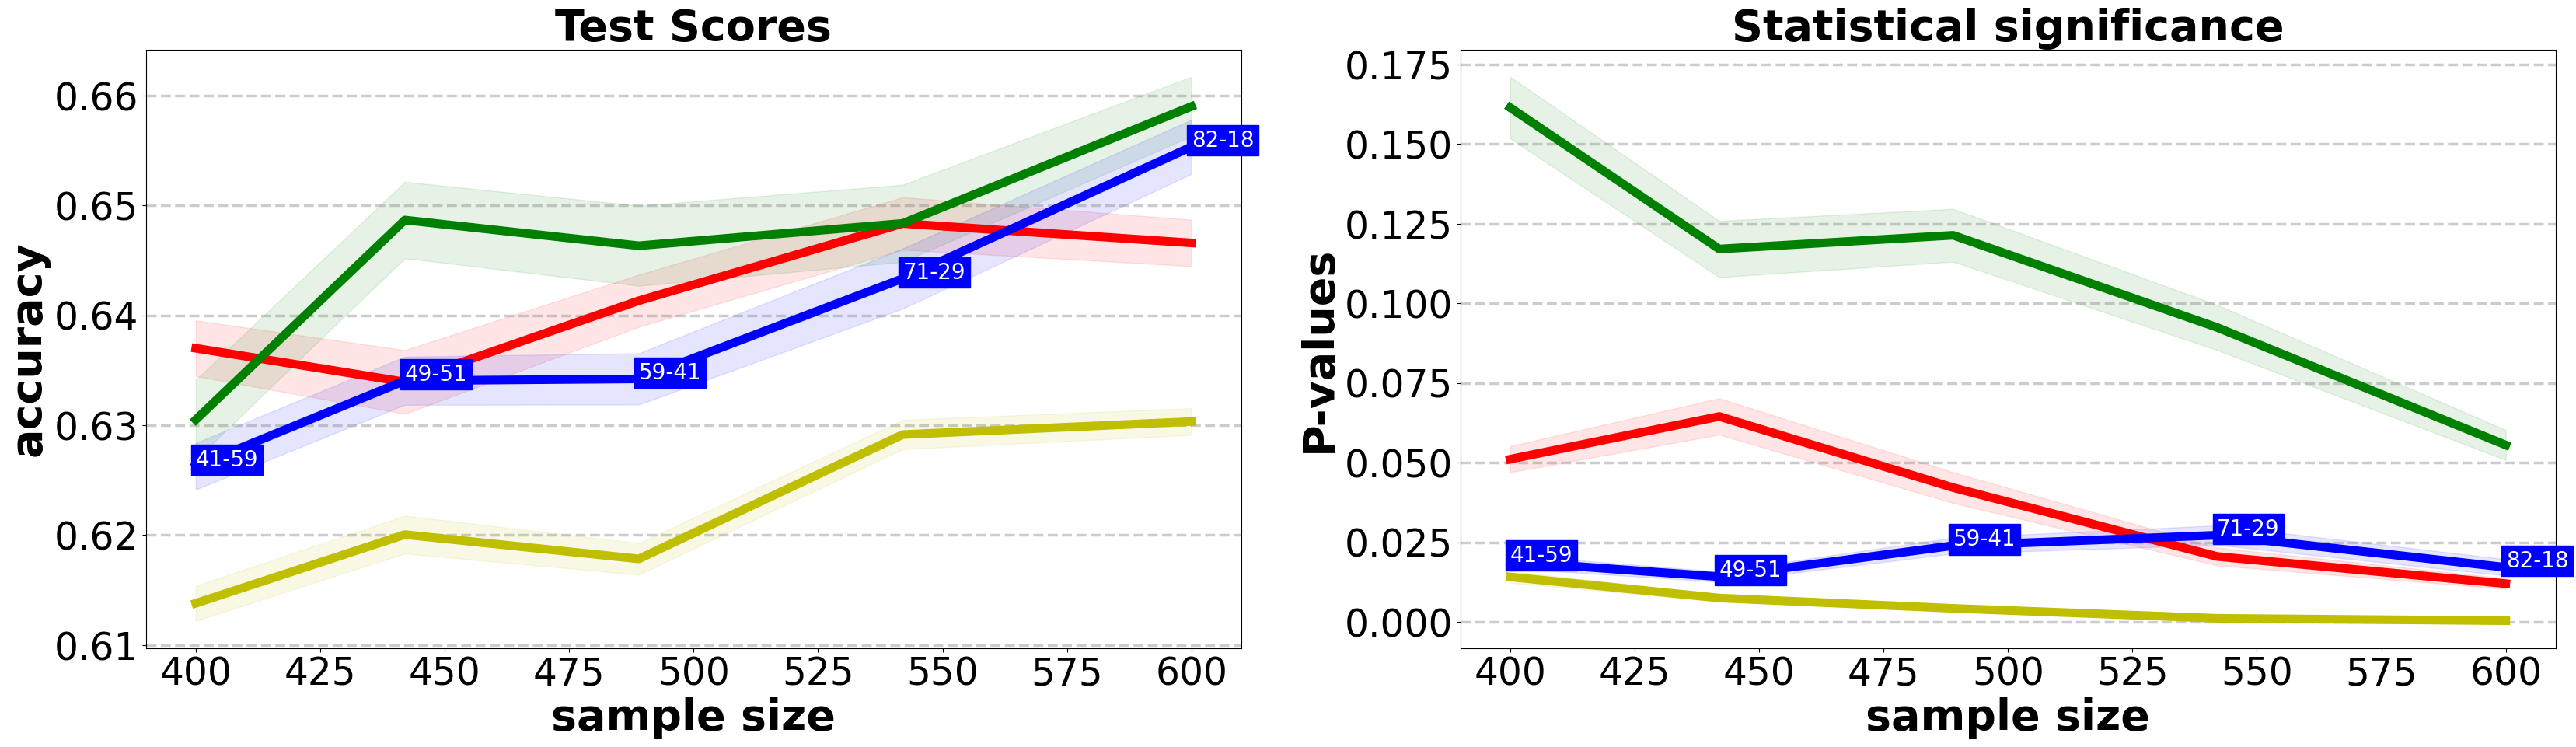

<Figure size 640x480 with 0 Axes>

In [9]:
dataset = '../data_out/ABIDE'

# Get data;
pareto_train_scores, pareto_train_se, \
halfsplit_train_scores, halfsplit_train_se, \
split9010_train_scores, split9010_train_se, \
adaptivesplit_train_scores, adaptivesplit_train_se = get_training(dataset, 5, 100)

pareto_test_scores, pareto_test_se, \
halfsplit_test_scores, halfsplit_test_se, \
split9010_test_scores, split9010_test_se, \
adaptivesplit_test_scores, adaptivesplit_test_se = get_test(dataset, 5, 100)

pareto_p_values, pareto_pval_se, \
halfsplit_p_values, halfsplit_pval_se, \
split9010_p_values, split9010_pval_se, \
adaptivesplit_p_values, adaptivesplit_pval_se = get_pvals(dataset, 5, 100)

# Plot data;
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    plot_analyses(dataset, 5, 100, scoring_label="accuracy")

plt.tight_layout()
plt.show()

## HCP dataset, results (train and test scores, p-values)

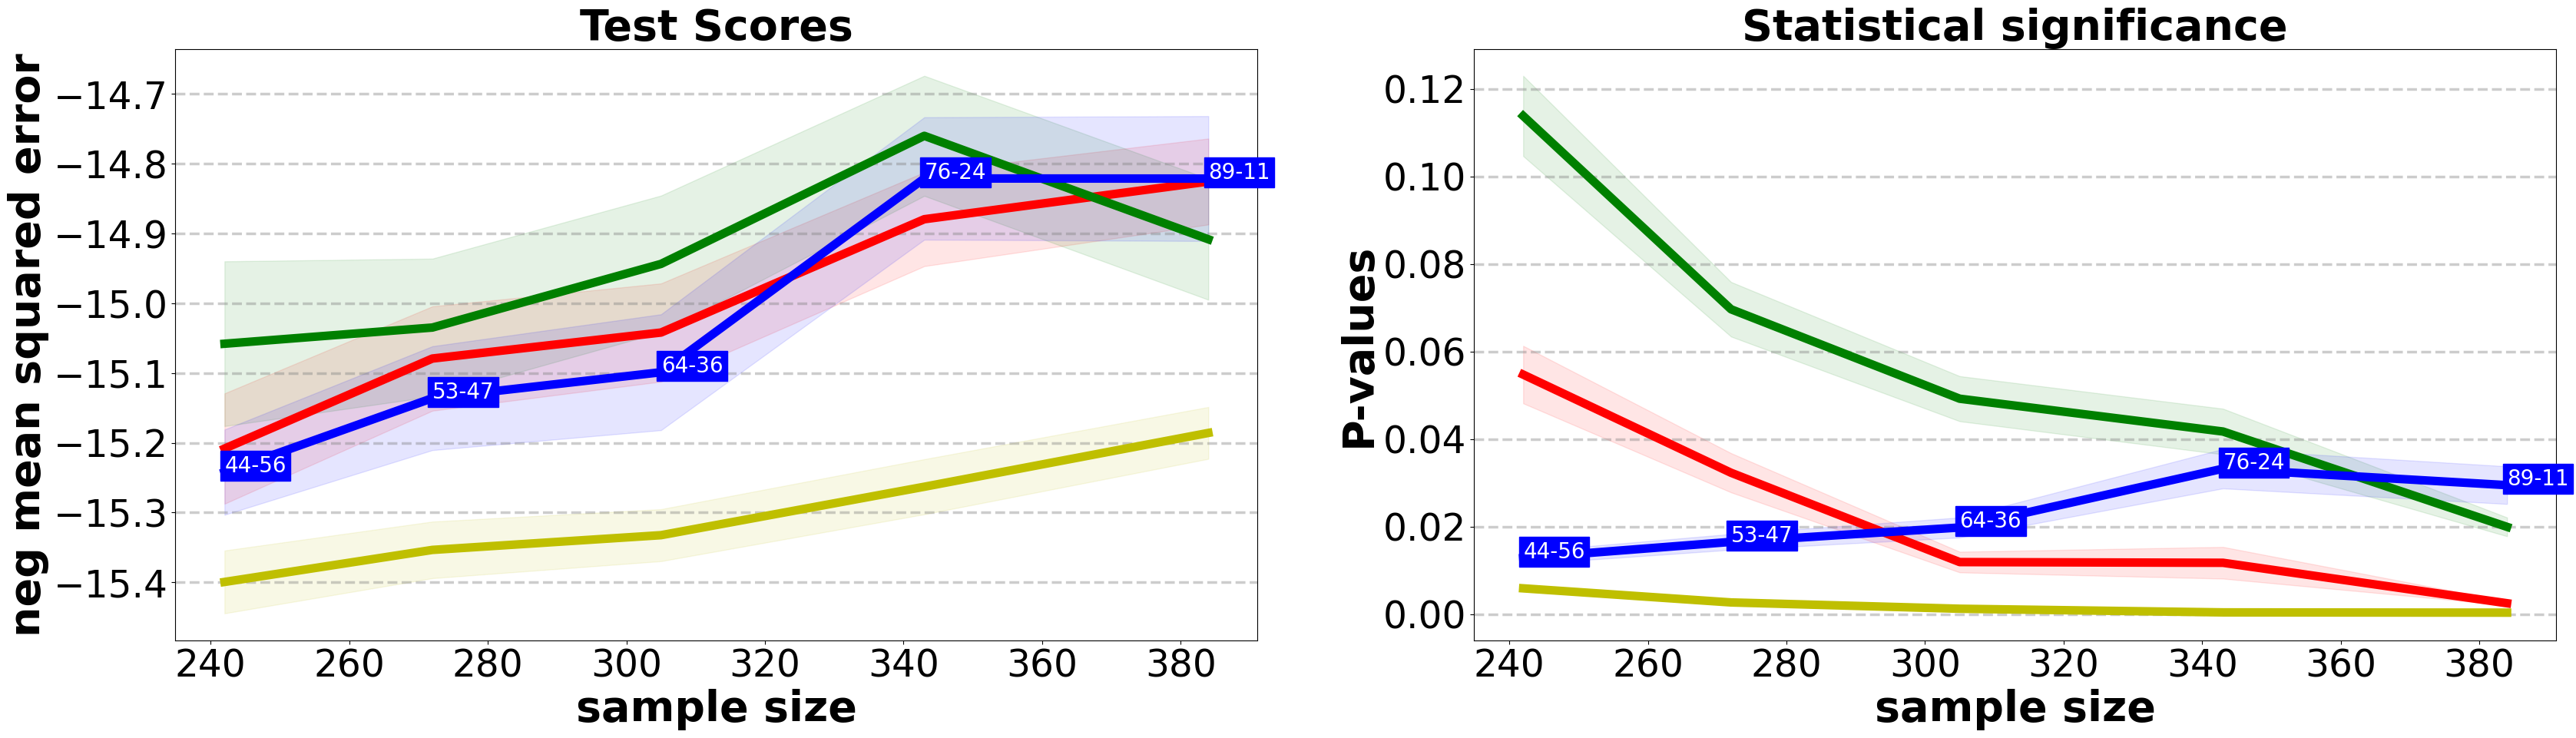

<Figure size 640x480 with 0 Axes>

In [10]:
dataset = '../data_out/HCP'

# Get data;
pareto_train_scores, pareto_train_se, \
halfsplit_train_scores, halfsplit_train_se, \
split9010_train_scores, split9010_train_se, \
adaptivesplit_train_scores, adaptivesplit_train_se = get_training(dataset, 5, 100)

pareto_test_scores, pareto_test_se, \
halfsplit_test_scores, halfsplit_test_se, \
split9010_test_scores, split9010_test_se, \
adaptivesplit_test_scores, adaptivesplit_test_se = get_test(dataset, 5, 100)

pareto_p_values, pareto_pval_se, \
halfsplit_p_values, halfsplit_pval_se, \
split9010_p_values, split9010_pval_se, \
adaptivesplit_p_values, adaptivesplit_pval_se = get_pvals(dataset, 5, 100)

# Plot data;
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    plot_analyses(dataset, 5, 100, scoring_label="neg mean squared error")

plt.tight_layout()
plt.show()

## IXI dataset, results (train and test scores, p-values)

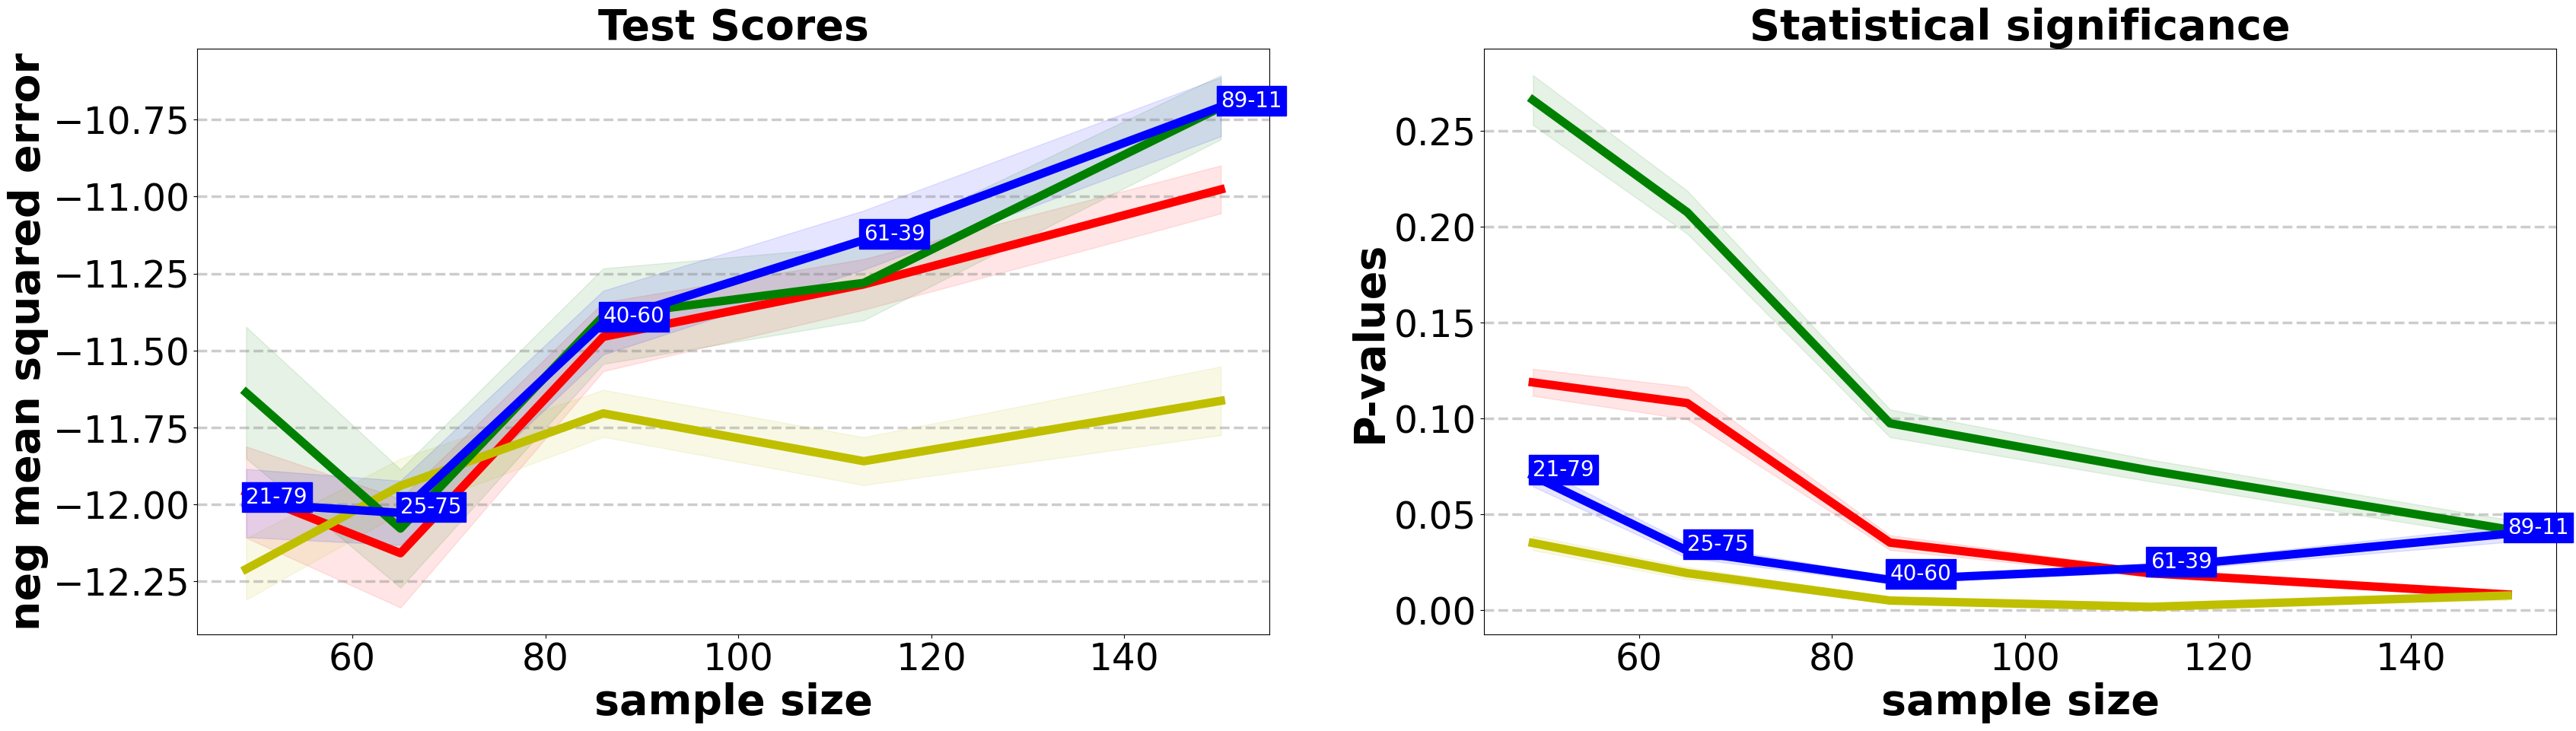

<Figure size 640x480 with 0 Axes>

In [11]:
dataset = '../data_out/IXI'

# Get data;
pareto_train_scores, pareto_train_se, \
halfsplit_train_scores, halfsplit_train_se, \
split9010_train_scores, split9010_train_se, \
adaptivesplit_train_scores, adaptivesplit_train_se = get_training(dataset, 5, 100)

pareto_test_scores, pareto_test_se, \
halfsplit_test_scores, halfsplit_test_se, \
split9010_test_scores, split9010_test_se, \
adaptivesplit_test_scores, adaptivesplit_test_se = get_test(dataset, 5, 100)

pareto_p_values, pareto_pval_se, \
halfsplit_p_values, halfsplit_pval_se, \
split9010_p_values, split9010_pval_se, \
adaptivesplit_p_values, adaptivesplit_pval_se = get_pvals(dataset, 5, 100)

# Plot data;
with warnings.catch_warnings(record=True) as w:
    warnings.simplefilter("always")
    plot_analyses(dataset, 5, 100, scoring_label="neg mean squared error")

plt.tight_layout()
plt.show()


## Get mean train and test performance for all datasets;

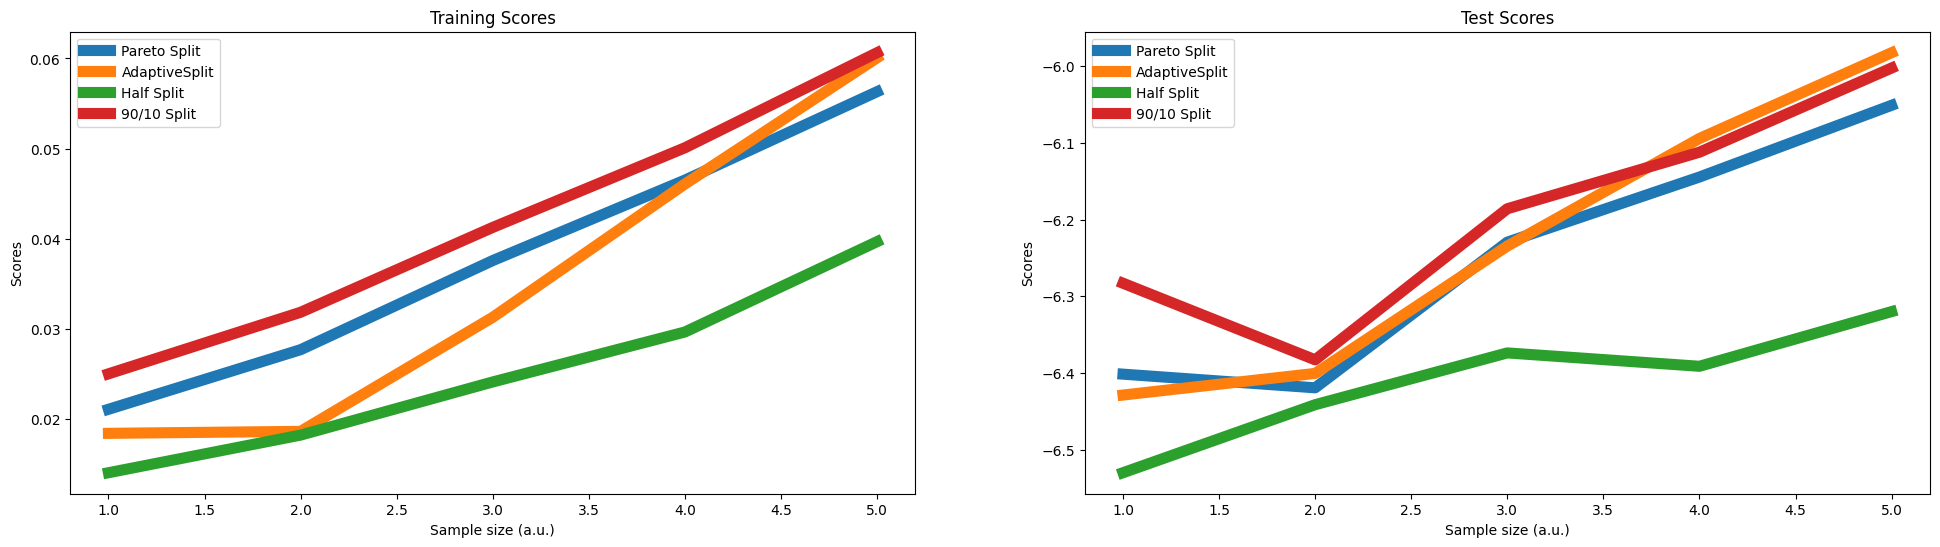

In [13]:
datasets = ['../data_out/IXI', '../data_out/BCW', '../data_out/ABIDE', '../data_out/HCP']
average_data = pd.DataFrame()

for dataset in datasets:
    data = pd.read_csv('./' + dataset + '/results.csv', delimiter=',', encoding='utf-8')

    n_samples = 5
    n_permutations = 100

    # get averaged train scores;
    average_data[dataset + '_pareto_train_scores'] = mean_window(data['pareto_train_scores'], n_samples, n_permutations)
    average_data[dataset + '_adaptivesplit_train_scores'] = mean_window(data['adaptivesplit_train_scores'], n_samples, n_permutations)
    average_data[dataset + '_halfsplit_train_scores'] = mean_window(data['halfsplit_train_scores'], n_samples, n_permutations)
    average_data[dataset + '_split90-10_train_scores'] = mean_window(data['split90-10_train_scores'], n_samples, n_permutations)

    # get averaged test scores;
    average_data[dataset + '_pareto_test_scores'] = mean_window(data['pareto_test_scores'], n_samples, n_permutations)
    average_data[dataset + '_adaptivesplit_test_scores'] = mean_window(data['adaptivesplit_test_scores'], n_samples, n_permutations)
    average_data[dataset + '_halfsplit_test_scores'] = mean_window(data['halfsplit_test_scores'], n_samples, n_permutations)
    average_data[dataset + '_split90-10_test_scores'] = mean_window(data['split90-10_test_scores'], n_samples, n_permutations)

mean_pareto_train_scores = average_data[[col for col in average_data.columns.values if col.endswith('_pareto_train_scores')]].mean(axis=1)
mean_adaptivesplit_train_scores = average_data[[col for col in average_data.columns.values if col.endswith('_adaptivesplit_train_scores')]].mean(axis=1)
mean_halfsplit_train_scores = average_data[[col for col in average_data.columns.values if col.endswith('_halfsplit_train_scores')]].mean(axis=1)
mean_split9010_train_scores = average_data[[col for col in average_data.columns.values if col.endswith('_split90-10_train_scores')]].mean(axis=1)

mean_pareto_test_scores = average_data[[col for col in average_data.columns.values if col.endswith('_pareto_test_scores')]].mean(axis=1)
mean_adaptivesplit_test_scores = average_data[[col for col in average_data.columns.values if col.endswith('_adaptivesplit_test_scores')]].mean(axis=1)
mean_halfsplit_test_scores = average_data[[col for col in average_data.columns.values if col.endswith('_halfsplit_test_scores')]].mean(axis=1)
mean_split9010_test_scores = average_data[[col for col in average_data.columns.values if col.endswith('_split90-10_test_scores')]].mean(axis=1)

# plot train scores;
plt.figure(figsize=(24, 6))

plt.subplot(1, 2, 1)
plt.plot(np.arange(1, n_samples +1), mean_pareto_train_scores)
plt.plot(np.arange(1, n_samples +1), mean_adaptivesplit_train_scores)
plt.plot(np.arange(1, n_samples +1), mean_halfsplit_train_scores)
plt.plot(np.arange(1, n_samples +1), mean_split9010_train_scores)
plt.title('Training Scores')
plt.xlabel('Sample size (a.u.)')
plt.ylabel('Scores')
plt.legend(['Pareto Split', 'AdaptiveSplit', 'Half Split', '90/10 Split'])


# plot test scores;
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, n_samples +1), mean_pareto_test_scores)
plt.plot(np.arange(1, n_samples +1), mean_adaptivesplit_test_scores)
plt.plot(np.arange(1, n_samples +1), mean_halfsplit_test_scores)
plt.plot(np.arange(1, n_samples +1), mean_split9010_test_scores)
plt.title('Test Scores')
plt.xlabel('Sample size (a.u.)')
plt.ylabel('Scores')
plt.legend(['Pareto Split', 'AdaptiveSplit', 'Half Split', '90/10 Split'])

plt.show()

## Check stops for the different datasets;

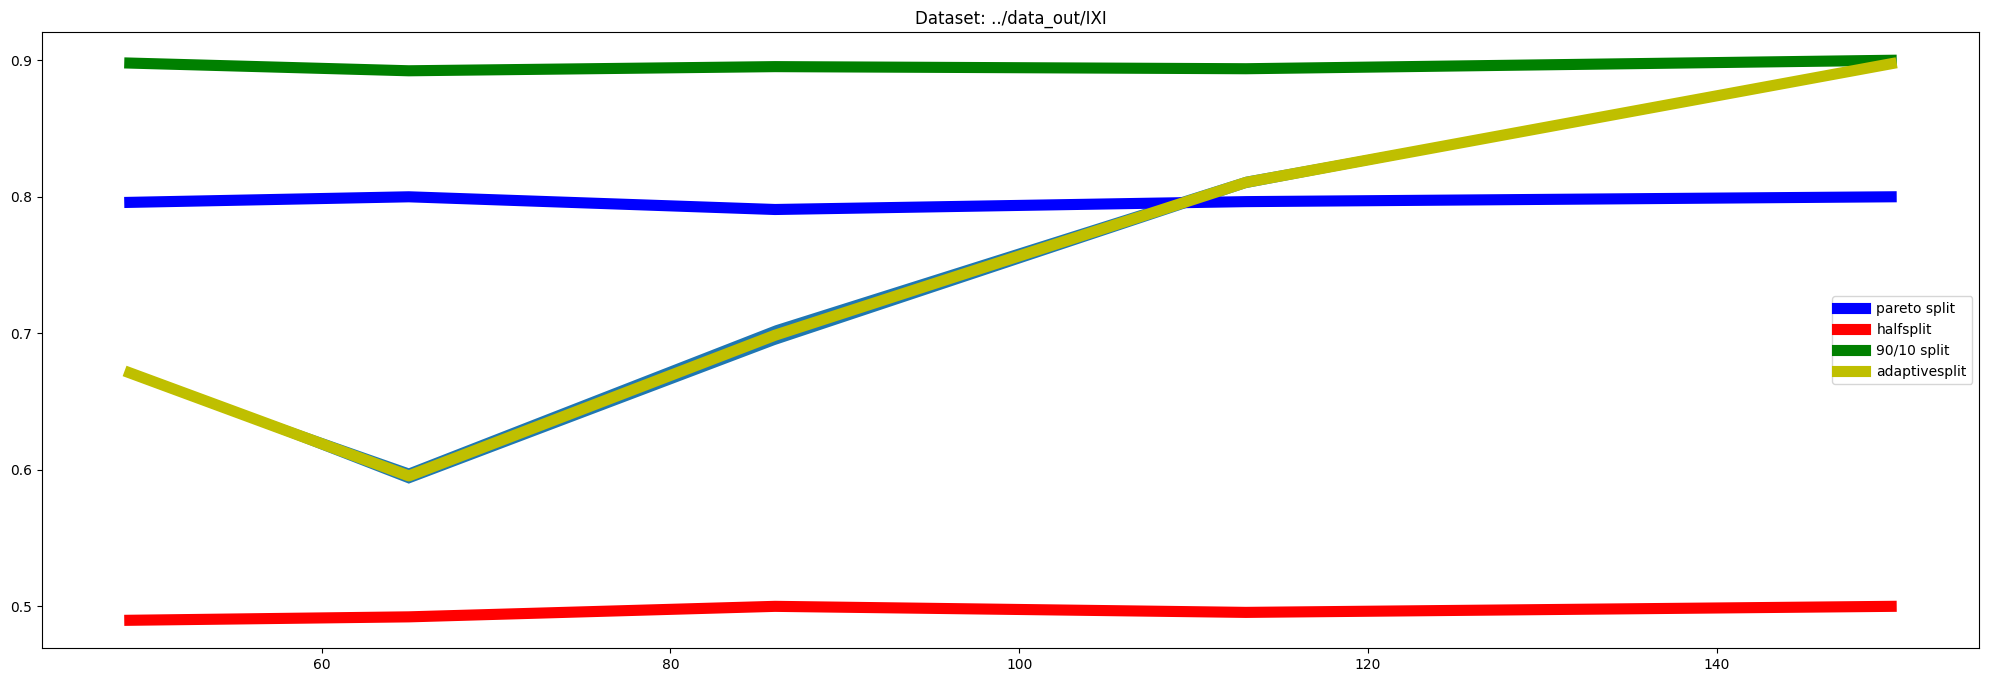

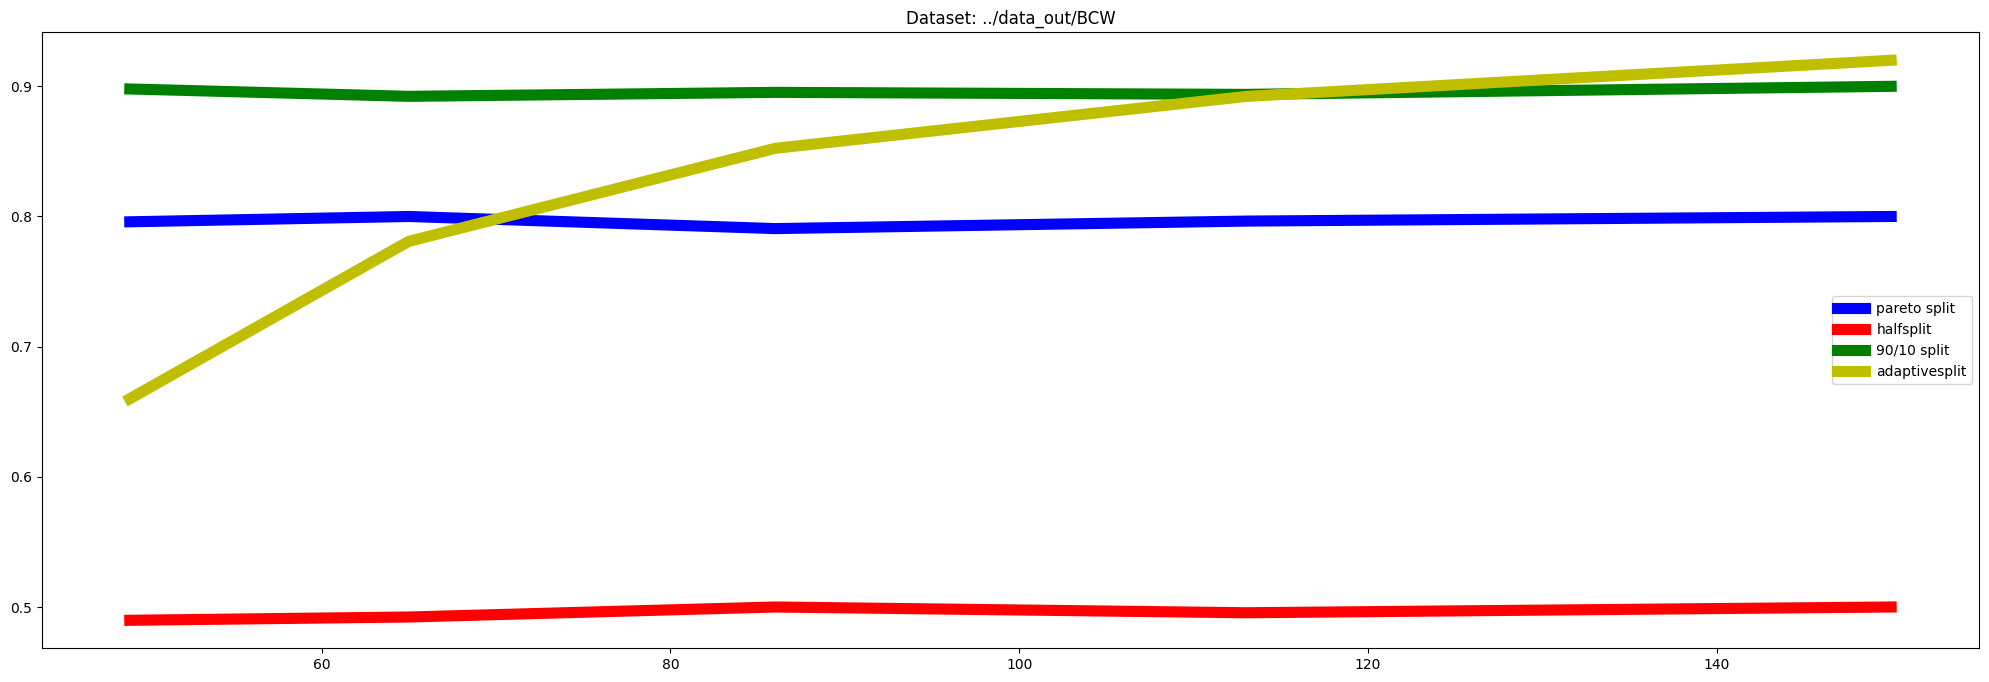

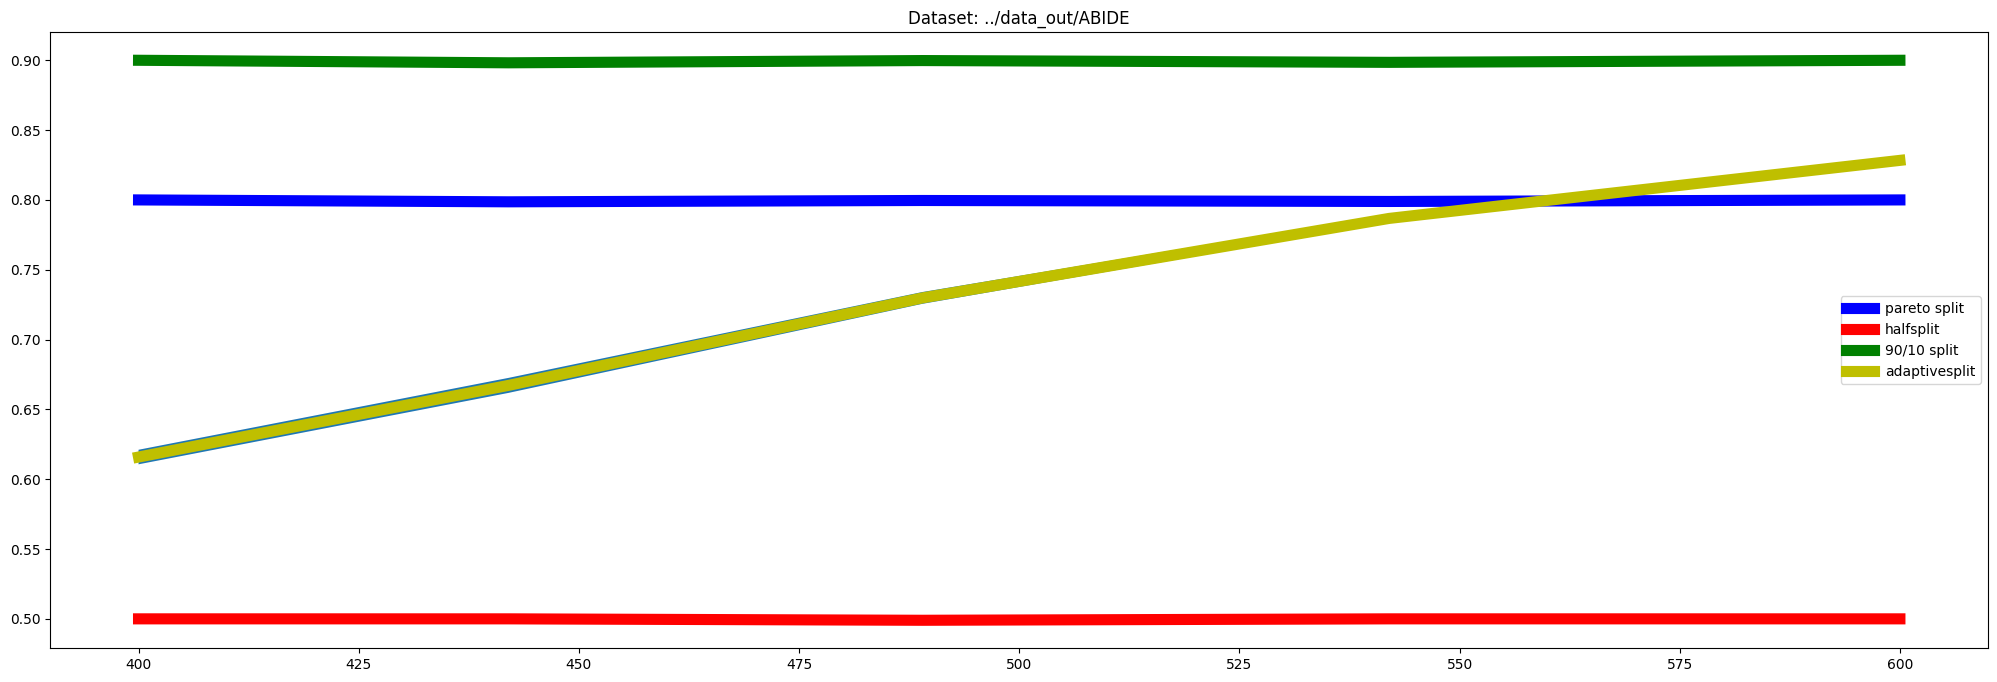

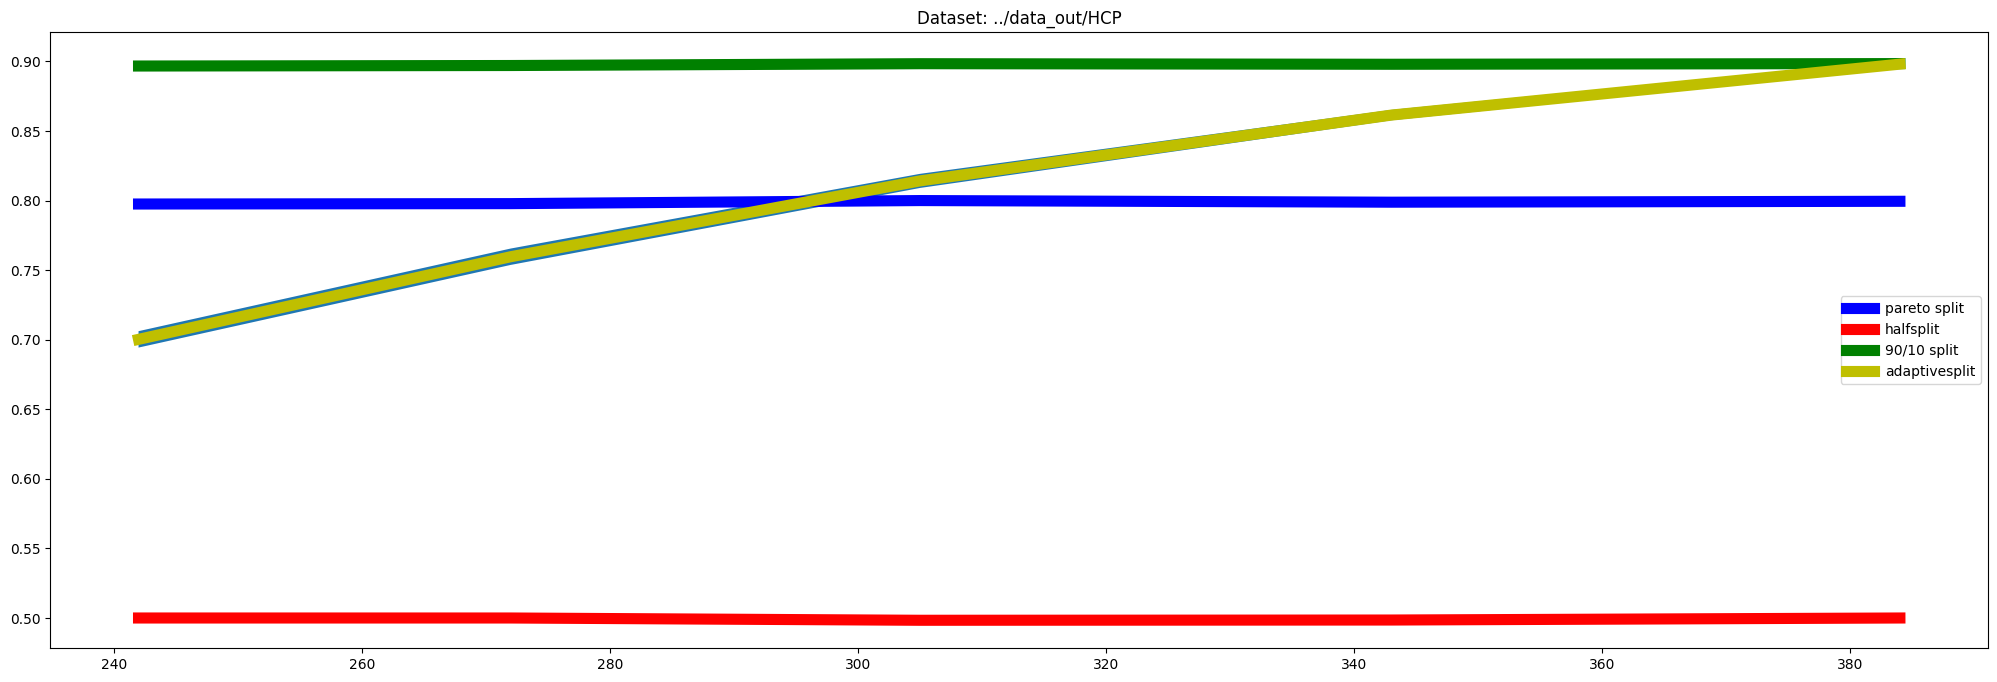

In [14]:
datasets = ['../data_out/IXI', '../data_out/BCW', '../data_out/ABIDE', '../data_out/HCP'] # beautify CIs (light grey?);

for dt in datasets:
    dataset = dt  
    data = pd.read_csv('./' + dataset + '/results.csv', delimiter=',', encoding='utf-8')

    n_samples = 5
    n_permutations = 100
    sample_sizes = data['truncate_sample_size'][0:n_samples]
    total_sample_size = data['truncate_sample_size']

    ads_ss = data.pivot( index="random_seed", columns="truncate_sample_size", values="adaptivesplit_sample_size")
    ads_tss = data.pivot( index="random_seed", columns="truncate_sample_size", values="truncate_sample_size")

    ads_se = (ads_ss/ads_tss).sem()

    pareto_stops = mean_window(data['pareto_sample_size']/total_sample_size, 5, 100)
    halfsplit_stops = mean_window(data['halfsplit_sample_size']/total_sample_size, 5, 100)
    split9010_stops = mean_window(data['split90-10_sample_size']/total_sample_size, 5, 100)
    adaptivesplit_stops = mean_window(data['adaptivesplit_sample_size']/total_sample_size, 5, 100)

    plt.figure(figsize=(25,8)) # 95% intervals instead of sem;
    plt.plot(sample_sizes, pareto_stops, color='b')
    plt.plot(sample_sizes, halfsplit_stops, color='r')
    plt.plot(sample_sizes, split9010_stops, color='g')
    plt.plot(sample_sizes, adaptivesplit_stops, color='y')
    plt.fill_between(sample_sizes, adaptivesplit_stops-(ads_se/2), adaptivesplit_stops+(ads_se/2))
    plt.legend(['pareto split', 'halfsplit', '90/10 split', 'adaptivesplit'])
    plt.title('Dataset: ' + str(dt))
    plt.show()